Dataset generated successfully with 1000 properties and saved to 'C:\Users\Mayank  Narang\real_estate_data.csv'.
Average Price of Properties in Each City:
           City  Average_Price
0       Chicago   1.065245e+06
1        Dallas   1.016822e+06
2       Houston   1.016419e+06
3   Los Angeles   9.845888e+05
4      New York   1.072925e+06
5  Philadelphia   1.124982e+06
6       Phoenix   1.071824e+06
7   San Antonio   1.104351e+06
8     San Diego   9.982273e+05
9      San Jose   1.111262e+06

Top 5 Cities with Highest Average Property Price per Square Foot:
           City  Avg_Price_Per_SqFt
0  Philadelphia          605.722465
1   San Antonio          563.326066
2       Houston          553.428743
3      New York          533.389776
4       Chicago          532.976341

Correlation Matrix:
                        Price  Bedrooms  Bathrooms  Area_SqFt  \
Price                1.000000 -0.007516  -0.028458   0.059000   
Bedrooms            -0.007516  1.000000   0.040296   0.020110   
Bathr

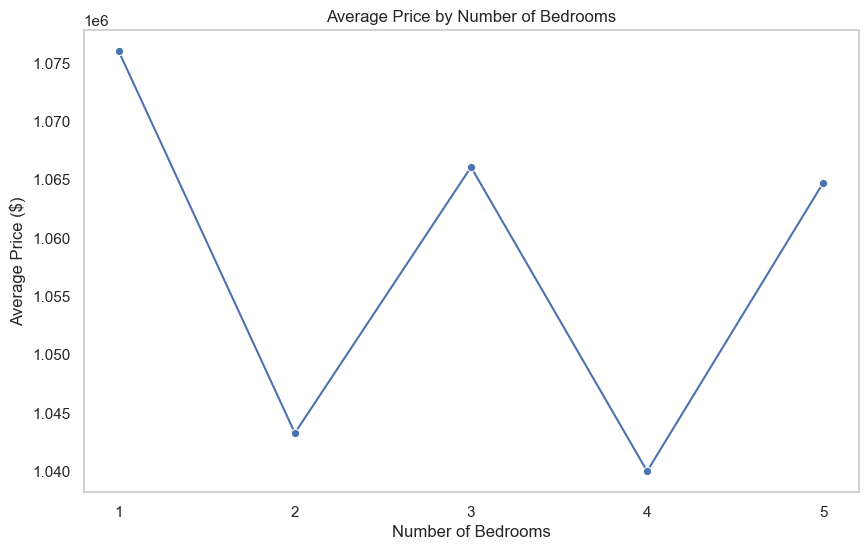

C:\Users\Mayank  Narang\AppData\Local\Temp\ipykernel_18256\957187477.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_proximity = real_estate_df.groupby(proximity_bins)['Price'].mean().reset_index()


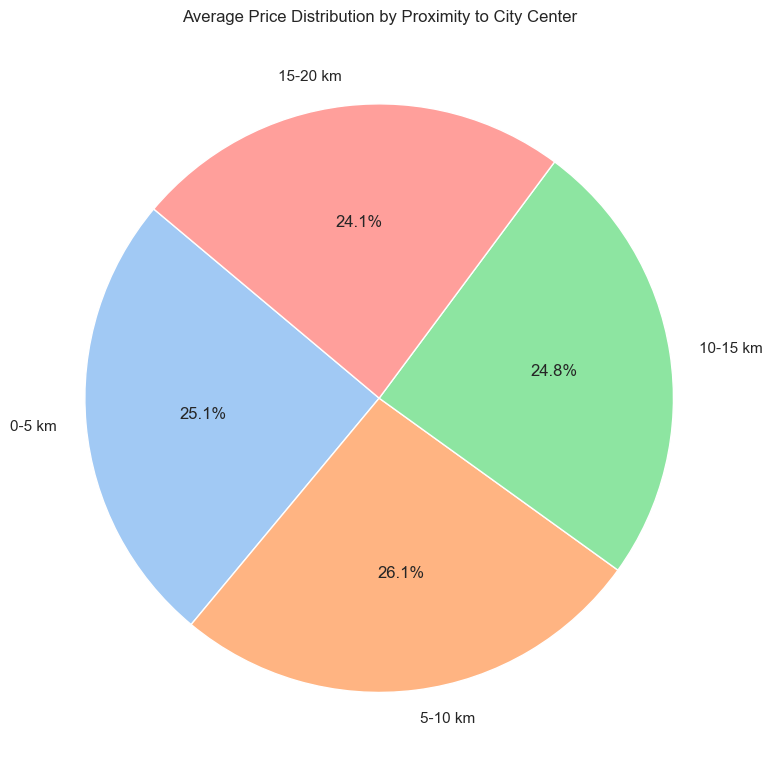

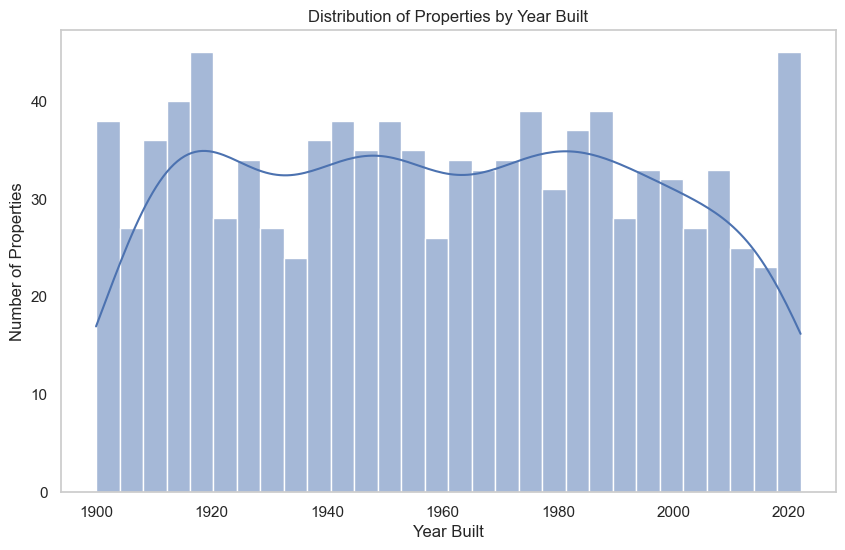

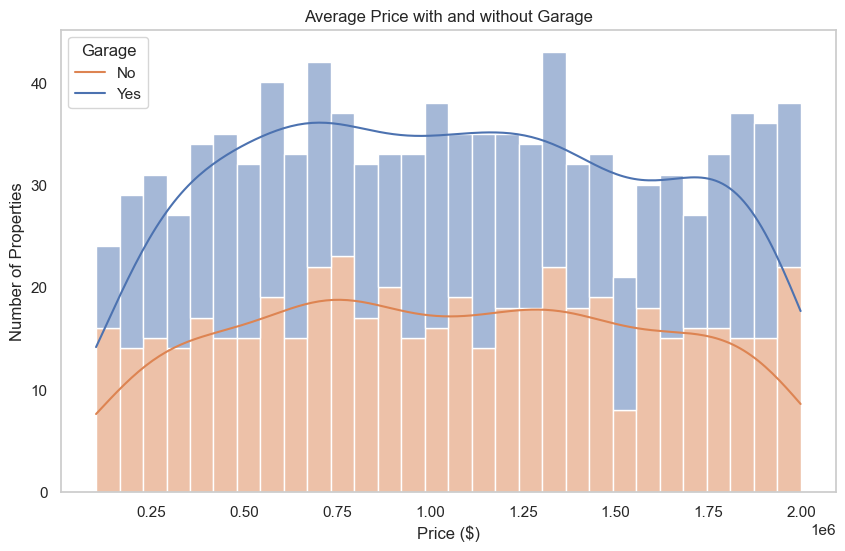

C:\Users\Mayank  Narang\AppData\Local\Temp\ipykernel_18256\957187477.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='City', x='Crime_Rate', data=avg_crime_rate_by_city, palette='magma')


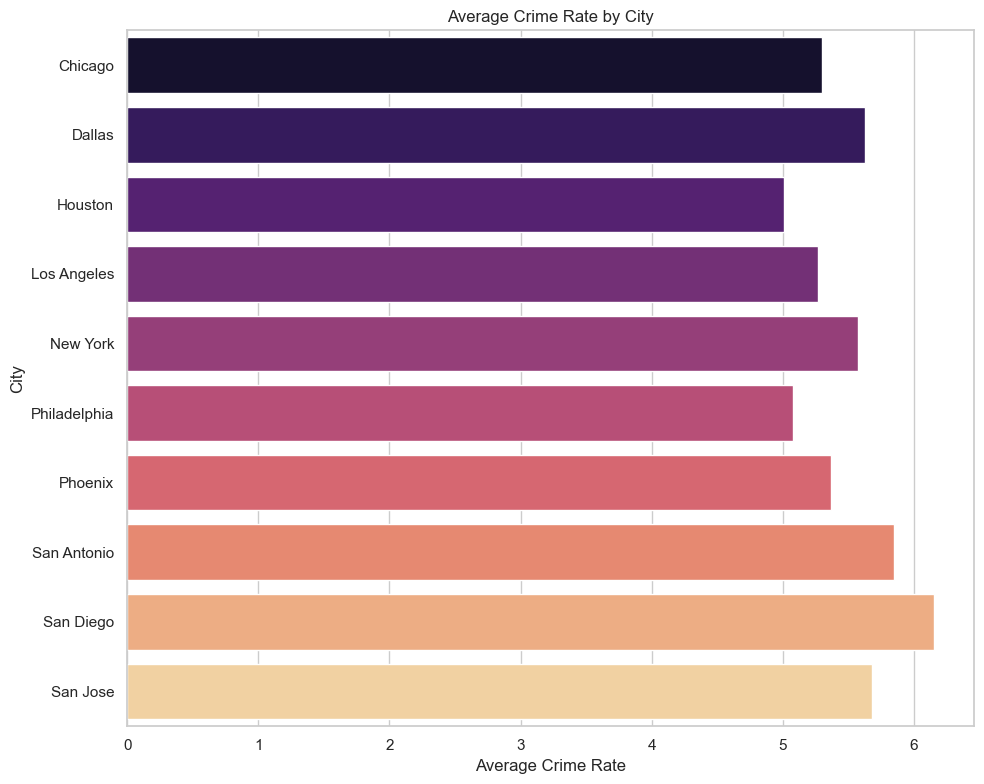

In [2]:
import pandas as pd
import numpy as np
import os

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for dataset generation
num_properties = 1000
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 
          'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']

# Generate random data
data = {
    'Property_ID': range(1, num_properties + 1),
    'City': np.random.choice(cities, num_properties),
    'Price': np.random.randint(100000, 2000001, num_properties),
    'Area_SqFt': np.random.randint(500, 5001, num_properties),
    'Bedrooms': np.random.randint(1, 6, num_properties),
    'Bathrooms': np.random.randint(1, 6, num_properties),
    'Proximity_to_Center': np.random.uniform(0, 20, num_properties),  # Distance in km
    'Year_Built': np.random.randint(1900, 2023, num_properties),
    'Garage': np.random.choice([0, 1], num_properties)  # 0 = No, 1 = Yes
}

# Create the DataFrame
real_estate_df = pd.DataFrame(data)

# Save the dataset to a CSV file
output_file = 'real_estate_data.csv'
real_estate_df.to_csv(output_file, index=False)

# Print the location of the saved CSV file
print(f"Dataset generated successfully with 1000 properties and saved to '{os.path.abspath(output_file)}'.")
# Query 1: Calculate the average price of properties in each city
avg_price_per_city = real_estate_df.groupby('City')['Price'].mean().reset_index()
avg_price_per_city.columns = ['City', 'Average_Price']
print("Average Price of Properties in Each City:")
print(avg_price_per_city)

# Query 2: Identify the top 5 cities with the highest average property price per square foot
real_estate_df['Price_per_SqFt'] = real_estate_df['Price'] / real_estate_df['Area_SqFt']
top_cities_price_per_sqft = real_estate_df.groupby('City')['Price_per_SqFt'].mean().nlargest(5).reset_index()
top_cities_price_per_sqft.columns = ['City', 'Avg_Price_Per_SqFt']
print("\nTop 5 Cities with Highest Average Property Price per Square Foot:")
print(top_cities_price_per_sqft)

# Query 3: Find the correlation between property price and other factors
correlation_matrix = real_estate_df[['Price', 'Bedrooms', 'Bathrooms', 'Area_SqFt', 
                                       'Proximity_to_Center', 'Year_Built', 'Garage']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Query 4: Average price for properties with and without a garage
avg_price_by_garage = real_estate_df.groupby('Garage')['Price'].mean().reset_index()
avg_price_by_garage['Garage'] = avg_price_by_garage['Garage'].replace({0: 'No Garage', 1: 'With Garage'})
print("\nAverage Price for Properties with and without a Garage:")
print(avg_price_by_garage) 

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Avg price by number of bedrooms (Line Plot)
avg_price_by_bedrooms = real_estate_df.groupby('Bedrooms')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_bedrooms, x='Bedrooms', y='Price', marker='o')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price ($)')
plt.xticks(avg_price_by_bedrooms['Bedrooms'])
plt.grid()
plt.savefig('avg_price_by_bedrooms.png')
plt.show()

# 2 Group proximity to center into bins
proximity_bins = pd.cut(real_estate_df['Proximity_to_Center'], 
                        bins=[0, 5, 10, 15, 20], 
                        labels=['0-5 km', '5-10 km', '10-15 km', '15-20 km'])

# Calculate the average price for each proximity range
avg_price_by_proximity = real_estate_df.groupby(proximity_bins)['Price'].mean().reset_index()
avg_price_by_proximity.columns = ['Proximity_Range', 'Average_Price']

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_price_by_proximity['Average_Price'], 
        labels=avg_price_by_proximity['Proximity_Range'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))
plt.title('Average Price Distribution by Proximity to City Center')
plt.tight_layout()
plt.savefig('price_proximity_piechart.png')
plt.show()


# 3. Distribution by year built (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(real_estate_df['Year_Built'], bins=30, kde=True)
plt.title('Distribution of Properties by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Number of Properties')
plt.grid()
plt.savefig('year_built_distribution.png')
plt.show()

# 4. Avg Price with and without garage (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=real_estate_df, x='Price', hue='Garage', bins=30, kde=True, multiple="stack")
plt.title('Average Price with and without Garage')
plt.xlabel('Price ($)')
plt.ylabel('Number of Properties')
plt.legend(title='Garage', labels=['No', 'Yes'])
plt.grid()
plt.savefig('avg_price_with_without_garage.png')
plt.show()

# 5.Examine the average crime rate for each city to understand which cities are perceived as safer.
real_estate_df['Crime_Rate'] = np.random.uniform(1, 10, num_properties)  # Adding a Crime_Rate column randomly
avg_crime_rate_by_city = real_estate_df.groupby('City')['Crime_Rate'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(y='City', x='Crime_Rate', data=avg_crime_rate_by_city, palette='magma')
plt.title('Average Crime Rate by City')
plt.xlabel('Average Crime Rate')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('avg_crime_rate_by_city.png')
plt.show()